# House Price

##  1. download data and read data to memory


In [1]:
import os
import tarfile
from six.moves import urllib

In [2]:
DOWNLOAD_URL = "https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.tgz"
LOCAL_STORE_DIR = "./datasets/housing"
STORE_FILE_NAME = "housing.tgz"

#def download_url_store_path(download_url = DOWNLOAD_URL,store_dir = LOCAL_STORE_DIR,store_file_name = STORE_FILE_NAME ):
#定义下载方法
def download_url_store_path(download_url ,store_dir ,store_file_name  ):
    #查看数据存储文件夹是否存在
    if not os.path.isdir(store_dir):
        os.makedirs(store_dir)
        
    #拼接路径
    store_path = os.path.join(store_dir,store_file_name)
    
    #下载文件
    urllib.request.urlretrieve(download_url,store_path)


    


In [3]:
#进行下载
download_url_store_path(download_url = DOWNLOAD_URL,store_dir = LOCAL_STORE_DIR,store_file_name = STORE_FILE_NAME )

In [4]:
#确定需要tar解压的文件路径
STORE_PATH = os.path.join(LOCAL_STORE_DIR,STORE_FILE_NAME)

#定义解压方法
def tar_extractall(from_path,to_path ):
    #创捷文件对象
    tar_file = tarfile.open(from_path)
    #解压到对应路径
    tar_file.extractall(path = to_path )
    #释放文件对象
    tar_file.close()
    


In [5]:
#解压
tar_extractall(from_path = STORE_PATH , to_path = LOCAL_STORE_DIR )

In [3]:
import pandas as pd

LOCAL_STORE_DIR = "./datasets/housing"

#将磁盘中csv文件加载到内存中pd表格对象
def load_housing_data(store_dir):
    csv_path = os.path.join(store_dir,"housing.csv")
    return pd.read_csv(csv_path)

#读取、初始化数据对象
housing_pd = load_housing_data(store_dir = LOCAL_STORE_DIR)

## 2.take q quick look at the data structure

In [4]:
#查看数据的前五行，了解一下基本情况
housing_pd.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
#主要显示行列基本信息
housing_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
#离散型属性分析
housing_pd["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [7]:
#连续型属性分析
housing_pd.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


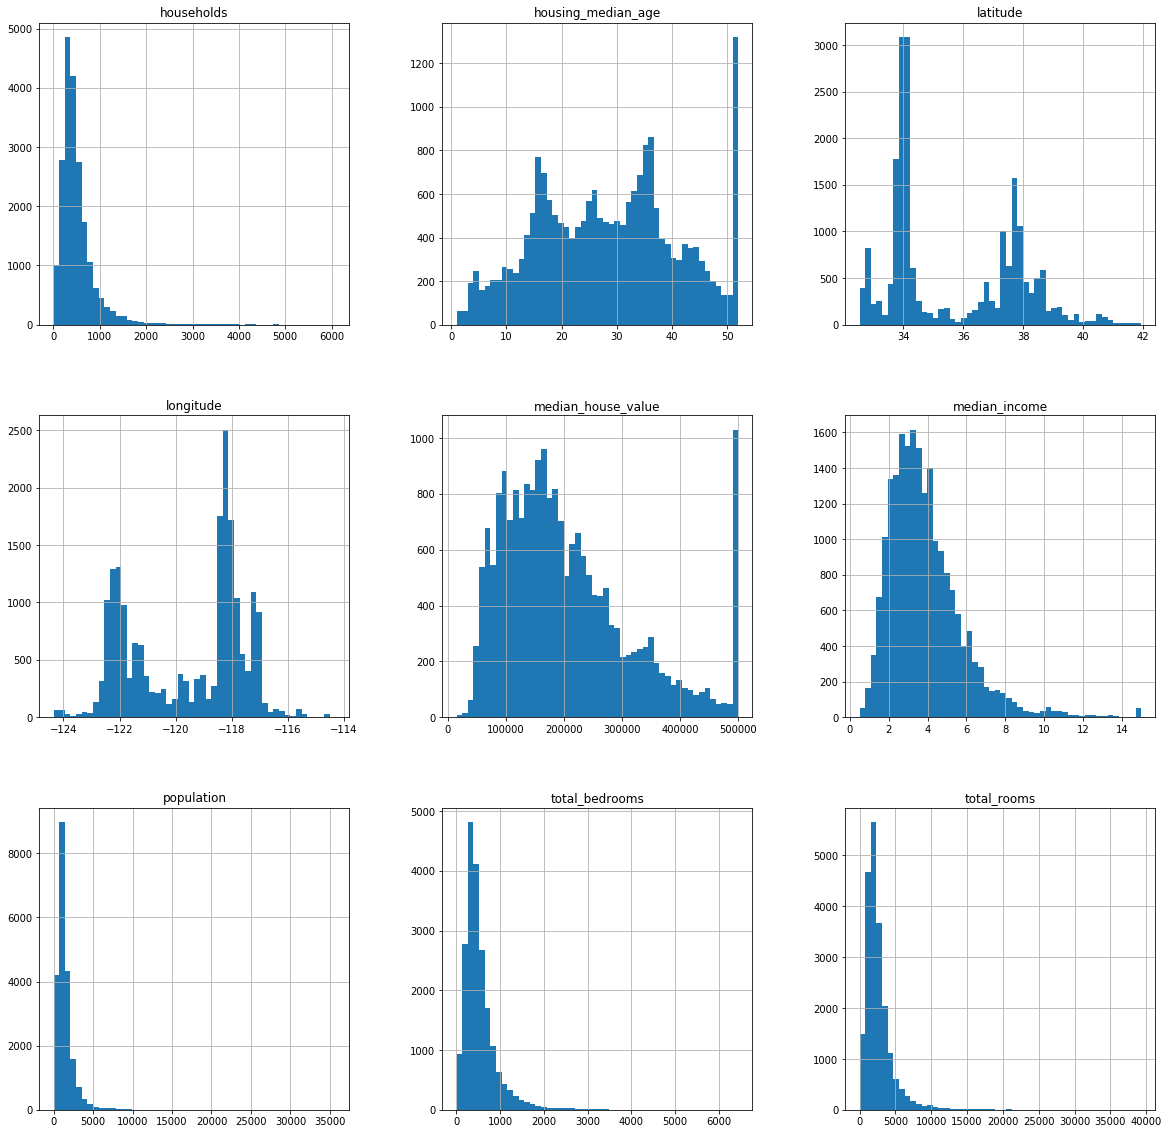

In [8]:
# 可视化分析
%matplotlib inline
import matplotlib.pyplot as plt
#绘制直方图
housing_pd.hist(bins = 50,figsize = (20,20))
plt.show()

## 3.create train set and test set

In [4]:
from sklearn.model_selection import train_test_split

In [10]:
#获取训练集，测试集
test_ratio = 0.3
random_state = 42
train_set , test_set = train_test_split(housing_pd , test_size = test_ratio , random_state = random_state)

In [11]:
print("train set size :" , len(train_set) , " , test set size : " , len(test_set))

train set size : 14448  , test set size :  6192


In [12]:
train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
7061,-118.02,33.93,35.0,2400.0,398.0,1218.0,408.0,4.1312,193800.0,<1H OCEAN
14689,-117.09,32.79,20.0,2183.0,534.0,999.0,496.0,2.8631,169700.0,NEAR OCEAN
17323,-120.14,34.59,24.0,1601.0,282.0,731.0,285.0,4.2026,259800.0,NEAR OCEAN
10056,-121.00,39.26,14.0,810.0,151.0,302.0,138.0,3.1094,136100.0,INLAND
15750,-122.45,37.77,52.0,3188.0,708.0,1526.0,664.0,3.3068,500001.0,NEAR BAY


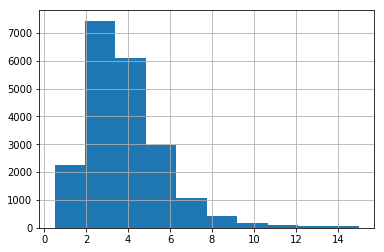

In [13]:
#对家庭平均收入进行离散化前，先进行离散化分析
housing_pd['median_income'].hist(bins = 10)

In [5]:
import numpy as np
#离散化处理
housing_pd['income_cat'] = np.ceil(housing_pd['median_income'] / 1.5)
housing_pd['income_cat'].value_counts()


3.0     7236
2.0     6581
4.0     3639
5.0     1423
1.0      822
6.0      532
7.0      189
8.0      105
9.0       50
11.0      49
10.0      14
Name: income_cat, dtype: int64

In [6]:
#再分为5段
#前4不变，其余都归到第五类中
housing_pd["income_cat"].where(housing_pd["income_cat"] < 5 , 5.0 ,inplace = True)

In [7]:
housing_pd['income_cat'].value_counts()

3.0    7236
2.0    6581
4.0    3639
5.0    2362
1.0     822
Name: income_cat, dtype: int64

In [8]:
#分层采用获取训练集，测试集
test_ratio = 0.3
random_state = 42

from sklearn.model_selection import StratifiedShuffleSplit
#获取模型
split_model = StratifiedShuffleSplit(n_splits=1, test_size=test_ratio, random_state=random_state)

#训练模型
for train_index, test_index in split_model.split(housing_pd,housing_pd['income_cat']):
    print("TRAIN:", train_index, "TEST:", test_index)
    #按索引分离数据
    train_set = housing_pd.loc[train_index]
    test_set = housing_pd.loc[test_index]

TRAIN: [ 8577  5960  4753 ... 15591  5676  7730] TEST: [17966 17037  7313 ...  8136 15200 13586]


In [18]:
#输出分类比例
#训练集比例
train_set["income_cat"].value_counts() / len(train_set)


3.0    0.350568
2.0    0.318868
4.0    0.176287
5.0    0.114480
1.0    0.039798
Name: income_cat, dtype: float64

In [19]:
#测试集比例
test_set["income_cat"].value_counts() / len(test_set)

3.0    0.350614
2.0    0.318798
4.0    0.176357
5.0    0.114341
1.0    0.039890
Name: income_cat, dtype: float64

In [20]:
#分层采样后,将中间化处理过程中,离散化标签进行丢弃
#训练集，测试集均需要进行处理
for drop_set in (train_set, test_set):
    drop_set.drop("income_cat", axis=1, inplace=True)

## 4.discover and visualize the data to gain insights

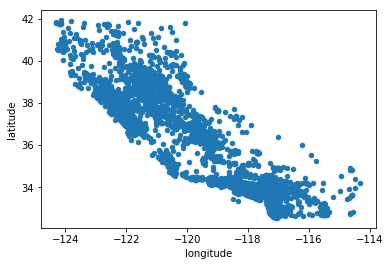

In [21]:
train_set.plot(kind="scatter",x="longitude",y="latitude")

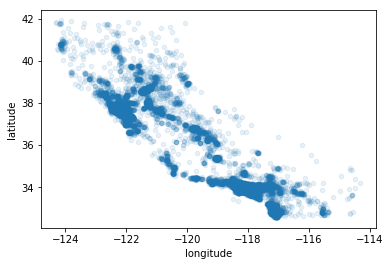

In [22]:
train_set.plot(kind="scatter",x="longitude",y="latitude",alpha = 0.1)

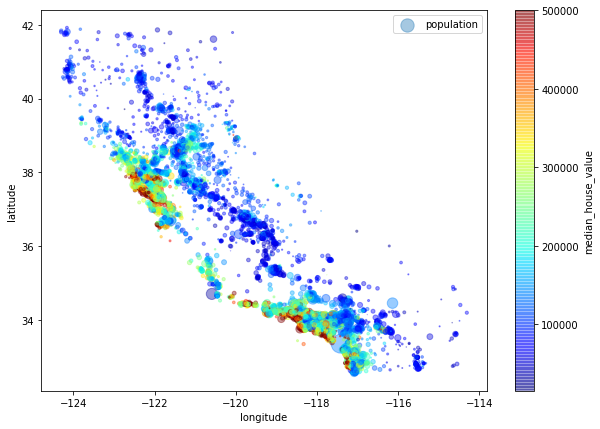

In [23]:
train_set.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=train_set["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()

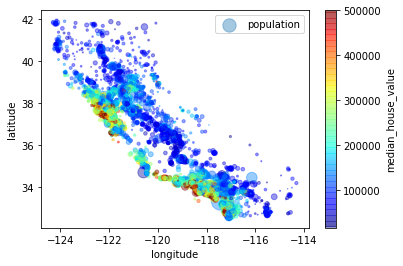

In [24]:
train_set.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=train_set["population"]/100, label="population",
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()

## 5.look for correlations

In [9]:
housing_set = train_set.copy()

In [26]:
#获取协方差矩阵
housing_corr_matrix = housing_set.corr()
#获取标签（房价）的协方差分析
housing_corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687873
total_rooms           0.136801
housing_median_age    0.116305
households            0.066788
total_bedrooms        0.049523
population           -0.024592
longitude            -0.052345
latitude             -0.137864
Name: median_house_value, dtype: float64

In [27]:
#获取Python中对象的类型
type(housing_corr_matrix["median_house_value"].sort_values(ascending=False)[:4])

pandas.core.series.Series

In [28]:
#找出与平均房价相关度最大的几个属性
most_corr_attributes = housing_corr_matrix["median_house_value"].sort_values(ascending=False)[:4].index

In [29]:
housing_set[most_corr_attributes].head()

,median_house_value,median_income,total_rooms,housing_median_age
8577,500001.0,7.2316,1428.0,31.0
5960,203000.0,4.9844,2671.0,29.0
4753,192500.0,2.9130,1090.0,31.0
15423,121900.0,2.8214,3163.0,13.0
9788,250000.0,5.3245,768.0,39.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f594e8e5a58>,
      dtype=object)

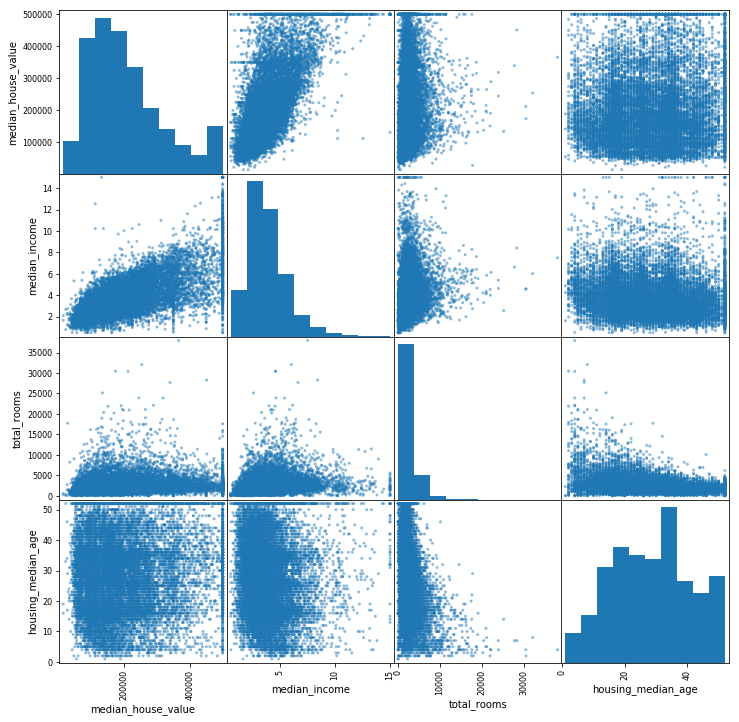

In [30]:
#协方差可视化
from pandas.plotting import scatter_matrix

scatter_matrix(housing_set[most_corr_attributes],figsize=(12,12))

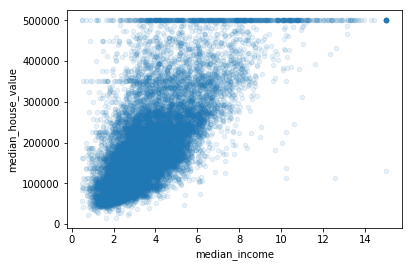

In [31]:
housing_set.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1)

[0, 16, 0, 550000]

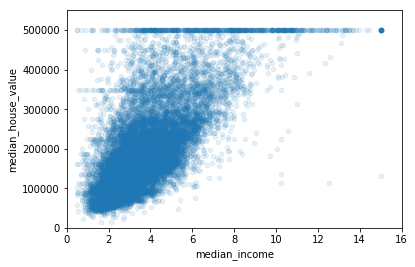

In [32]:
housing_set.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1)
plt.axis([0, 16, 0, 550000])

## 6. prepare data for model

###  6.1连续值属性，记录值缺失情况的处理

In [10]:
#属性
housing_attributes = train_set.drop("median_house_value",axis = 1)
#标签
housing_label = train_set["median_house_value"].copy()

In [11]:
from sklearn.preprocessing import Imputer

In [12]:
#创建模型，选择参数
imputer = Imputer(strategy = "median")
#获取数值型属性
#housing_num = housing_attributes.drop("ocean_proximity",axis = 1)
housing_num = housing_attributes.select_dtypes(include=[np.number])
#进行训练、学习
imputer.fit(housing_num)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [13]:
#输出均值
housing_num.median().values

array([-118.51 ,   34.26 ,   29.   , 2111.   ,  430.   , 1159.   ,
        406.   ,    3.536,    3.   ])

In [14]:
imputer.statistics_

array([-118.51 ,   34.26 ,   29.   , 2111.   ,  430.   , 1159.   ,
        406.   ,    3.536,    3.   ])

In [15]:
#填充缺失值
transform_housing_num = imputer.transform(housing_num)

In [16]:
#训练并处理
fit_trans_housing_num = imputer.transform(housing_num)

In [17]:
#fit_trans_housing_num.head()
#行 列 组装 numpy ndarrays
housing_tr = pd.DataFrame(fit_trans_housing_num,
                          columns = housing_num.columns)

In [18]:
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,income_cat
0,-118.41,33.89,31.0,1428.0,320.0,677.0,331.0,7.2316,5.0
1,-117.83,34.11,29.0,2671.0,437.0,1484.0,445.0,4.9844,4.0
2,-118.33,34.04,31.0,1090.0,251.0,955.0,239.0,2.9130,2.0
3,-117.26,33.20,13.0,3163.0,725.0,1675.0,629.0,2.8214,2.0
4,-120.51,35.91,39.0,768.0,162.0,264.0,118.0,5.3245,4.0


###  6.2离散型属性，统一编码方法

In [19]:
#离散型属性
housing_cat = housing_set['ocean_proximity']
housing_cat.head(10)


8577      <1H OCEAN
5960         INLAND
4753      <1H OCEAN
15423     <1H OCEAN
9788         INLAND
16873    NEAR OCEAN
8106     NEAR OCEAN
14913    NEAR OCEAN
14427    NEAR OCEAN
3870      <1H OCEAN
Name: ocean_proximity, dtype: object

In [20]:
from sklearn.preprocessing import LabelEncoder

#标签编码器
label_encoder = LabelEncoder()

housing_cat = housing_set['ocean_proximity']

#训练并转化
housing_cat_encoded = label_encoder.fit_transform(housing_cat)

housing_cat_encoded[:5]

array([0, 1, 0, 0, 1])

In [21]:
#输出模型学到的参数
#类别标签
label_encoder.classes_

array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)

In [22]:
from sklearn.preprocessing import OneHotEncoder

#0、1向量组编码器
one_hot_encoder = OneHotEncoder()

housing_cat_one_hot = one_hot_encoder.fit_transform(housing_cat_encoded.reshape(-1,1))

In [23]:
#矩阵转数组的表现方式
housing_cat_one_hot.toarray()

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.]])

In [24]:
#两者结合的编码器
from sklearn.preprocessing import LabelBinarizer

label_bin_encoder = LabelBinarizer()

housing_cat_one_hot = label_bin_encoder.fit_transform(housing_cat)

housing_cat_one_hot

array([[1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       ...,
       [0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0]])

In [48]:
#from sklearn.preprocessing import CategoricalEncoder

### 6.3 衍生新的属性（特征）

In [25]:
#通过类的方式，为原始数据添加一些衍生属性

#自定义处理器需要导入的包
from sklearn.base import BaseEstimator, TransformerMixin




class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    #初始化变量
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        #对象内变量无需提前声明
        self.add_bedrooms_per_room = add_bedrooms_per_room
        self.rooms_ix,  self.bedrooms_ix,  self.population_ix,  self.household_ix = 3, 4, 5, 6
        
        
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):
        values = X.values
        columns = X.columns
        rooms_per_household = values[:, self.rooms_ix] / values[:, self.household_ix]
        population_per_household = values[:,  self.population_ix] / values[:,  self.household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = values[:,  self.bedrooms_ix] / values[:,  self.rooms_ix]
            housing_extra_attribs = np.c_[values, rooms_per_household, population_per_household,
                                          bedrooms_per_room]
            
            housing_extra_attribs = pd.DataFrame(housing_extra_attribs, columns=list(columns)
                                                 +["rooms_per_household", "population_per_household","bedrooms_per_room"])
            
            
            return housing_extra_attribs
        else:
            housing_extra_attribs = np.c_[values, rooms_per_household, population_per_household]
            
            housing_extra_attribs = pd.DataFrame(housing_extra_attribs, columns=list(columns)+["rooms_per_household", "population_per_household"])
            
            return housing_extra_attribs




In [26]:
#构造添加器模型的对象
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
#获取新衍生出来的属性
housing_extra_attribs = attr_adder.transform(housing_set)
#查看添加新属性后的数据
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat,rooms_per_household,population_per_household
0,-118.41,33.89,31,1428,320,677,331,7.2316,500001,<1H OCEAN,5,4.3142,2.04532
1,-117.83,34.11,29,2671,437,1484,445,4.9844,203000,INLAND,4,6.00225,3.33483
2,-118.33,34.04,31,1090,251,955,239,2.913,192500,<1H OCEAN,2,4.56067,3.99582
3,-117.26,33.2,13,3163,725,1675,629,2.8214,121900,<1H OCEAN,2,5.02862,2.66296
4,-120.51,35.91,39,768,162,264,118,5.3245,250000,INLAND,4,6.50847,2.23729


### 6.4 流水线型管线处理，依次执行缺失值填充、属性添加、归一化操作

In [27]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.base import BaseEstimator, TransformerMixin

#pd 2 np (DataFrame to Array)
class DataFrameSelector(BaseEstimator, TransformerMixin):
    #设置超参数
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    #学习模型
    def fit(self, X, y=None):
        return self
    #使用模型
    def transform(self, X):
        #返回特征列表上对应的值(记录)
        return X[self.attribute_names].values


In [28]:
#获取特征
housing_attributes = train_set.drop("median_house_value",axis = 1)
#housing_attributes = housing_pd.drop("median_house_value",axis = 1)
#获取数值型特征
#通过数据类型来选择元素，参数为选择的类型
housing_num = housing_attributes.select_dtypes(include=[np.number])

In [30]:
#自定义处理器需要导入的包
from sklearn.base import BaseEstimator, TransformerMixin

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    #初始化变量
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        #对象内变量无需提前声明
        self.add_bedrooms_per_room = add_bedrooms_per_room
        self.rooms_ix,  self.bedrooms_ix,  self.population_ix,  self.household_ix = 3, 4, 5, 6
        
        
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, values, y=None):
        
        rooms_per_household = values[:, self.rooms_ix] / values[:, self.household_ix]
        population_per_household = values[:,  self.population_ix] / values[:,  self.household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = values[:,  self.bedrooms_ix] / values[:,  self.rooms_ix]
            housing_extra_attribs = np.c_[values, rooms_per_household, population_per_household,
                                          bedrooms_per_room]
            return housing_extra_attribs
        else:
            housing_extra_attribs = np.c_[values, rooms_per_household, population_per_household]
            
            return housing_extra_attribs

In [29]:
#获取数值型特征
num_attribs = list(housing_num)
#获取离散型特征
cat_attribs = ["ocean_proximity"]

In [31]:
#管线的设计与开发存在不少难点
from sklearn.preprocessing import Imputer
#数值型特征处理管线
num_pipeline = Pipeline([
    ('selector',DataFrameSelector(num_attribs)), #选取特征对应的数据
    ('imputer',Imputer(strategy = "median")),    #填充缺失值
    ('attribs_addr',CombinedAttributesAdder()),  #衍生新的属性
    ('std_scaler',StandardScaler()),             #数值归一化（标准化）
                    ])

In [32]:
from sklearn.preprocessing import LabelBinarizer
#离散型特征处理管线
cat_pipeline = Pipeline([
    ('selector',DataFrameSelector(cat_attribs)), #选取特征对应的数据
    ('label_binarizer',LabelBinarizer()),        #将离散型标签，统一转化为OneHot(One2Other)型数值标签
        ])

In [33]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import check_array
from sklearn.preprocessing import LabelEncoder
from scipy import sparse

class CategoricalEncoder(BaseEstimator, TransformerMixin):
  
    def __init__(self, encoding='onehot', categories='auto', dtype=np.float64,
                 handle_unknown='error'):
        self.encoding = encoding
        self.categories = categories
        self.dtype = dtype
        self.handle_unknown = handle_unknown

    def fit(self, X, y=None):
        """Fit the CategoricalEncoder to X.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_feature]
            The data to determine the categories of each feature.
        Returns
        -------
        self
        """

        if self.encoding not in ['onehot', 'onehot-dense', 'ordinal']:
            template = ("encoding should be either 'onehot', 'onehot-dense' "
                        "or 'ordinal', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.handle_unknown not in ['error', 'ignore']:
            template = ("handle_unknown should be either 'error' or "
                        "'ignore', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.encoding == 'ordinal' and self.handle_unknown == 'ignore':
            raise ValueError("handle_unknown='ignore' is not supported for"
                             " encoding='ordinal'")

        X = check_array(X, dtype=np.object, accept_sparse='csc', copy=True)
        n_samples, n_features = X.shape

        self._label_encoders_ = [LabelEncoder() for _ in range(n_features)]

        for i in range(n_features):
            le = self._label_encoders_[i]
            Xi = X[:, i]
            if self.categories == 'auto':
                le.fit(Xi)
            else:
                valid_mask = np.in1d(Xi, self.categories[i])
                if not np.all(valid_mask):
                    if self.handle_unknown == 'error':
                        diff = np.unique(Xi[~valid_mask])
                        msg = ("Found unknown categories {0} in column {1}"
                               " during fit".format(diff, i))
                        raise ValueError(msg)
                le.classes_ = np.array(np.sort(self.categories[i]))

        self.categories_ = [le.classes_ for le in self._label_encoders_]

        return self

    def transform(self, X):
        """Transform X using one-hot encoding.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_features]
            The data to encode.
        Returns
        -------
        X_out : sparse matrix or a 2-d array
            Transformed input.
        """
        X = check_array(X, accept_sparse='csc', dtype=np.object, copy=True)
        n_samples, n_features = X.shape
        X_int = np.zeros_like(X, dtype=np.int)
        X_mask = np.ones_like(X, dtype=np.bool)

        for i in range(n_features):
            valid_mask = np.in1d(X[:, i], self.categories_[i])

            if not np.all(valid_mask):
                if self.handle_unknown == 'error':
                    diff = np.unique(X[~valid_mask, i])
                    msg = ("Found unknown categories {0} in column {1}"
                           " during transform".format(diff, i))
                    raise ValueError(msg)
                else:
                    # Set the problematic rows to an acceptable value and
                    # continue `The rows are marked `X_mask` and will be
                    # removed later.
                    X_mask[:, i] = valid_mask
                    X[:, i][~valid_mask] = self.categories_[i][0]
            X_int[:, i] = self._label_encoders_[i].transform(X[:, i])

        if self.encoding == 'ordinal':
            return X_int.astype(self.dtype, copy=False)

        mask = X_mask.ravel()
        n_values = [cats.shape[0] for cats in self.categories_]
        n_values = np.array([0] + n_values)
        indices = np.cumsum(n_values)

        column_indices = (X_int + indices[:-1]).ravel()[mask]
        row_indices = np.repeat(np.arange(n_samples, dtype=np.int32),
                                n_features)[mask]
        data = np.ones(n_samples * n_features)[mask]

        out = sparse.csc_matrix((data, (row_indices, column_indices)),
                                shape=(n_samples, indices[-1]),
                                dtype=self.dtype).tocsr()
        if self.encoding == 'onehot-dense':
            return out.toarray()
        else:
            return out

In [38]:
from sklearn.preprocessing import LabelBinarizer
#离散型特征处理管线
cat_pipeline = Pipeline([
    ('selector',DataFrameSelector(cat_attribs)), #选取特征对应的数据
    ('cat_encoder', CategoricalEncoder(encoding="onehot-dense")),        #将离散型标签，统一转化为OneHot(One2Other)型数值标签
        ])


In [37]:
#管线并行执行，最后进行结果整合，获取预处理后的所有特征
from sklearn.pipeline import FeatureUnion
full_pipeline_union = FeatureUnion(transformer_list=[
        ('num_pipeline',num_pipeline),
        ('cat_pipeline',cat_pipeline),
     ])

In [39]:
#训练集数据进行整体预处理
housing_prepared = full_pipeline_union.fit_transform(housing_attributes)

housing_prepared.shape

(14448, 17)

##  7 Select and Train a Model

###  7.1训练和评估(评价)训练集

In [40]:
#在训练集上训练模型

from sklearn.linear_model import LinearRegression

#获取线性回归训练模型对象
linear_reg = LinearRegression()

#获取标签
housing_labels = train_set["median_house_value"].copy()

#训练模型
linear_reg.fit(housing_prepared,housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [41]:
# 在训练集上进行预测，得到模型在训练集的评价（误差大小）

#引入评价标准：均方误差
from sklearn.metrics import mean_squared_error

#获取预测得到的标签组
housing_train_prediction = linear_reg.predict(housing_prepared)

#将真实标签与预测标签进行比较，获取方差（连续型标签比较误差）
linear_mse =  mean_squared_error(housing_labels,housing_train_prediction)

#获取对应均方误差
linear_rmse = np.sqrt(linear_mse)

linear_rmse

68490.71365715806

### 7.2在测试集上进行预测、评估

In [42]:
#分离测试集的特征集和标签

#属性
housing_test_attributes = test_set.drop("median_house_value",axis = 1)
#标签
housing_test_labels = test_set["median_house_value"].copy()

In [54]:
#测试集数据进行整体预处理
housing_test_prepared = full_pipeline_union.fit_transform(housing_test_attributes)

housing_test_prepared.shape

(6192, 17)

In [44]:
#获取预测得到的标签组
housing_test_prediction = linear_reg.predict(housing_test_prepared)

#将真实标签与预测标签进行比较，获取方差（连续型标签比较误差）
linear_test_mse =  mean_squared_error(housing_test_labels,housing_test_prediction)

#获取对应均方误差
linear_test_rmse = np.sqrt(linear_test_mse)

linear_test_rmse

67170.31946040207

### 7.3 使用另一个模型：决策树模型

In [45]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

### 7.4 使用交叉验证检验模型性能

In [46]:
from sklearn.model_selection import cross_val_score

#选择均方误差作为评价，负值使误差越小分数越高。交叉个数为10
linear_scores = cross_val_score(linear_reg,housing_test_prepared,housing_test_labels,
                               scoring = "neg_mean_squared_error",cv = 10)
linear_rmse_scores = np.sqrt(-linear_scores)

#cv次验证的均方误差
#numpy.ndarray
linear_rmse_scores

array([69450.22579485, 66876.31996804, 68479.11072043, 65443.02344933,
       66055.23301105, 67098.26025542, 65727.18803068, 68492.30864715,
       66503.83625195, 69306.2647704 ])

In [47]:
type(linear_rmse_scores)

numpy.ndarray

In [48]:
#获取交叉验证误差的均值和标准值
def display_scores(scores):
    print("Scores : ",scores)
    print("Mean : ",scores.mean())
    print("Standard deviation :",scores.std())

In [49]:
display_scores(linear_rmse_scores)

Scores :  [69450.22579485 66876.31996804 68479.11072043 65443.02344933
 66055.23301105 67098.26025542 65727.18803068 68492.30864715
 66503.83625195 69306.2647704 ]
Mean :  67343.17708993013
Standard deviation : 1405.9677575615267


In [50]:
#选择均方误差作为评价，负值使误差越小分数越高。交叉个数为10
tree_scores = cross_val_score(tree_reg,housing_test_prepared,housing_test_labels,
                               scoring = "neg_mean_squared_error",cv = 10)
tree_rmse_scores = np.sqrt(-tree_scores)

#cv次验证的均方误差
#numpy.ndarray
tree_rmse_scores

array([76538.54668355, 71803.77971715, 73250.24551645, 70752.47804362,
       74456.62050069, 73347.77117314, 80731.34372816, 80885.37627234,
       85248.6469843 , 75619.46860668])

In [51]:
display_scores(tree_rmse_scores)

Scores :  [76538.54668355 71803.77971715 73250.24551645 70752.47804362
 74456.62050069 73347.77117314 80731.34372816 80885.37627234
 85248.6469843  75619.46860668]
Mean :  76263.4277226101
Standard deviation : 4400.603594410757


###  7.5 使用随机森林(回归)模型,集成学习的一种

In [52]:
#sklearn的模型存放位置比较混乱
from sklearn.ensemble import RandomForestRegressor

random_forest_reg = RandomForestRegressor()

forest_scores = cross_val_score(random_forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores :  [50238.51432543 56168.73741956 49380.0385586  54078.82149215
 54134.84770316 52548.09184554 52684.13554667 50698.65220366
 52508.94233709 54393.16911048]
Mean :  52683.39505423322
Standard deviation : 2000.0604945347525


In [ ]:
#使用训练集对随机森林模型进行训练
random_forest_reg.fit(housing_prepared,housing_labels)

In [59]:
#使用模型对训练集进行预测、评估

housing_predictions = random_forest_reg.predict(housing_prepared)
random_forest_mse = mean_squared_error(housing_labels, housing_predictions)
random_forest_rmse = np.sqrt(random_forest_mse)
random_forest_rmse

22204.519644161282

In [58]:
#使用随机森林模型对测试集进行预测、评估

housing_test_prediction = random_forest_reg.predict(housing_test_prepared)

#将真实标签与预测标签进行比较，获取方差（连续型标签比较误差）
random_forest_test_mse =  mean_squared_error(housing_test_labels,housing_test_prediction)

#获取对应均方误差
random_forest_test_rmse = np.sqrt(random_forest_test_mse)

random_forest_test_rmse

53484.52566227669

### 训练集上的误差明显比测试集上的误差低很多，针对该随机森林模型而言，训练发生了过拟合现象

### 7.6 存储、读取已有模型（模型备份技术）

In [60]:
#sklearn 外部包中作业库
from sklearn.externals import joblib

#存储模型 
joblib.dump(random_forest_reg ,'./random_forest_reg_model.pkl')

#读取模型
random_forest_reg_loaderd = joblib.load('./random_forest_reg_model.pkl')